In [18]:
import pandas as pd
import numpy as np
import math, copy
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r"c:\Users\barat\OneDrive\Desktop\Linear-Regression-Single-Input\datasets\House Price_vs_Area\HousePricevsArea.csv")
print("First 5 samples")
print(df.head())

First 5 samples
   Area_sqft    Price
0        600  1200000
1        650  1350000
2        700  1500000
3        750  1650000
4        800  1800000


In [20]:
x_train = df["Area_sqft"].values
y_train = df["Price"].values


In [21]:
print(f"x_train : {x_train}")
print(f"y_train : {y_train}")

x_train : [ 600  650  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250
 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950
 2000 2050]
y_train : [1200000 1350000 1500000 1650000 1800000 1950000 2100000 2250000 2400000
 2550000 2700000 2850000 3000000 3150000 3300000 3450000 3600000 3750000
 3900000 4050000 4200000 4350000 4500000 4650000 4800000 4950000 5100000
 5250000 5400000 5550000]


In [22]:
x_mean = x_train.mean()
x_std = x_train.std()
x_train = (x_train - x_mean)/x_std

In [23]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [24]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db 

In [25]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

In [26]:
w_init = 0
b_init = 0
temp_alpha = 0.01
iteration = 1000
w_final, b_final, J_hist, P_hist = gradient_descent(x_train, y_train, w_init, b_init, temp_alpha, iteration, compute_cost, compute_gradient)

Iteration    0: Cost 6.41e+12  dj_dw: -1.298e+06, dj_db: -3.375e+06   w:  1.298e+04, b: 3.37500e+04
Iteration  100: Cost 8.59e+11  dj_dw: -4.752e+05, dj_db: -1.235e+06   w:  8.278e+05, b: 2.15199e+06
Iteration  200: Cost 1.15e+11  dj_dw: -1.739e+05, dj_db: -4.522e+05   w:  1.126e+06, b: 2.92734e+06
Iteration  300: Cost 1.54e+10  dj_dw: -6.367e+04, dj_db: -1.655e+05   w:  1.235e+06, b: 3.21114e+06
Iteration  400: Cost 2.06e+09  dj_dw: -2.331e+04, dj_db: -6.058e+04   w:  1.275e+06, b: 3.31502e+06
Iteration  500: Cost 2.77e+08  dj_dw: -8.531e+03, dj_db: -2.218e+04   w:  1.290e+06, b: 3.35305e+06
Iteration  600: Cost 3.71e+07  dj_dw: -3.122e+03, dj_db: -8.117e+03   w:  1.295e+06, b: 3.36696e+06
Iteration  700: Cost 4.97e+06  dj_dw: -1.143e+03, dj_db: -2.971e+03   w:  1.297e+06, b: 3.37206e+06
Iteration  800: Cost 6.65e+05  dj_dw: -4.183e+02, dj_db: -1.088e+03   w:  1.298e+06, b: 3.37392e+06
Iteration  900: Cost 8.91e+04  dj_dw: -1.531e+02, dj_db: -3.981e+02   w:  1.298e+06, b: 3.37461e+06


In [27]:
w = w_final
b = b_final
print(f"w : {w}")
print(f"b : {b}")

w : 1298260.1673292466
b : 3374854.2970399894


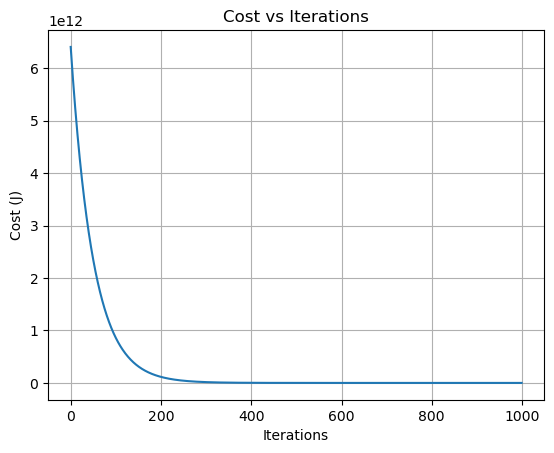

In [28]:
iterations = np.arange(len(J_hist))
plt.figure()
plt.plot(iterations, J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Cost vs Iterations")
plt.grid(True)
plt.savefig("results/cost_vs_iterations.png")
plt.show()

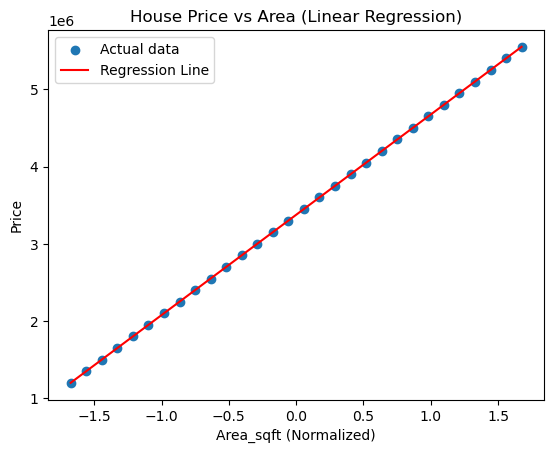

In [29]:
y_predict = w * x_train + b
plt.figure()
plt.scatter(x_train, y_train, label= "Actual data")
plt.plot(x_train, y_predict, color = "red", label="Regression Line")
plt.xlabel("Area_sqft (Normalized)")
plt.ylabel("Price")
plt.legend()
plt.title("House Price vs Area (Linear Regression)")
plt.savefig("results/regression_line.png")
plt.show()


In [30]:
x_input = float(input("Enter Area in sqft: "))
x_userInput = (x_input - x_mean) / x_std
y_predict = w * x_userInput + b
print(f"Price :{y_predict:.2f}")

Enter Area in sqft:  600


Price :1199948.19
